In [1]:
# Data Analysis
import pandas as pd

# Data Visualization
from matplotlib import pyplot as plt

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Utilities
import numpy as np
import warnings

In [132]:
# Esegui sul LowLevel 1 o sul LowLevel per verificare i cambiamenti tra LL e LL1

df_rough = pd.read_excel('workload_lowlevel_LL.xlsx')
df_rough.head()

print('The workload contains {:d} components and {:d} observations.'.format(df_rough.shape[1], df_rough.shape[0]))

df_const = df_rough[df_rough.columns[df_rough.nunique() == 1]]
df_const.head()

The workload contains 18 components and 304 observations.


,swpd,si,so,st
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [133]:
df_temp = df_rough[df_rough.columns[df_rough.nunique() != 1]]

#del df_temp['label']
#del df_temp['threadName']
#del df_temp['URL']
df_temp.head()

,r,b,free,buff,cache,bi,bo,in,cs,us,sy,id,wa,Cluster
0,1,0,3749472,46836,1387800,9220,0,549,492,0,29,67,4,1
1,1,0,3732248,46840,1398528,10576,0,1275,1011,1,46,49,5,1
2,2,0,3722232,46840,1409040,10496,48,1447,1136,2,63,29,7,1
3,1,0,3714328,46840,1417704,8640,0,1165,984,1,49,47,3,1
4,4,0,3709712,46848,1423596,6016,64,902,597,0,42,58,0,2


In [115]:
df_corr = df_temp.corr()
df_corr

,r,b,free,buff,cache,bi,bo,in,cs,us,sy,id,wa
r,1.000000,0.239689,-0.114093,0.024767,0.134241,-0.093846,0.003136,0.323325,0.002783,0.033236,0.378171,-0.392235,0.185656
b,0.239689,1.000000,0.011545,0.080362,0.037419,-0.030213,0.000539,0.126303,0.008562,-0.025087,0.117004,-0.347131,0.595412
free,-0.114093,0.011545,1.000000,-0.132016,-0.789028,0.418599,0.098218,-0.236312,0.300421,0.371359,-0.344110,0.237652,0.060741
buff,0.024767,0.080362,-0.132016,1.000000,0.266637,-0.216196,0.079086,0.279388,-0.068533,-0.087733,0.297290,-0.268946,0.066520
cache,0.134241,0.037419,-0.789028,0.266637,1.000000,-0.537541,-0.092079,0.264477,-0.432682,-0.464275,0.365080,-0.290815,0.037115
bi,-0.093846,-0.030213,0.418599,-0.216196,-0.537541,1.000000,0.017573,-0.165086,0.490394,0.444829,-0.177606,0.135720,-0.019246
bo,0.003136,0.000539,0.098218,0.079086,-0.092079,0.017573,1.000000,-0.081363,0.056774,0.138126,-0.076212,0.039940,0.026023
in,0.323325,0.126303,-0.236312,0.279388,0.264477,-0.165086,-0.081363,1.000000,0.155595,-0.048947,0.918093,-0.841867,0.198165
cs,0.002783,0.008562,0.300421,-0.068533,-0.432682,0.490394,0.056774,0.155595,1.000000,0.784120,0.019500,-0.050837,-0.012206
us,0.033236,-0.025087,0.371359,-0.087733,-0.464275,0.444829,0.138126,-0.048947,0.784120,1.000000,-0.149645,0.087531,-0.028168


In [116]:
mask = np.ones(df_corr.shape, dtype='bool')
mask[np.triu_indices(len(df_corr))] = False
mask

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False],
       [ True,  True, False, False, False, False, False, False, False,
        False, False, False, False],
       [ True,  True,  True, False, False, False, False, False, False,
        False, False, False, False],
       [ True,  True,  True,  True, False, False, False, False, False,
        False, False, False, False],
       [ True,  True,  True,  True,  True, False, False, False, False,
        False, False, False, False],
       [ True,  True,  True,  True,  True,  True, False, False, False,
        False, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True, False, False,
        False, False, False, False],
       [ True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False, False, False],
       [ True,  True,  True,

In [117]:
corr_comp = (df_corr == 1 & mask).values.nonzero()
corr_comp = [val[0] for val in corr_comp]
corr_comp

IndexError: index 0 is out of bounds for axis 0 with size 0

In [134]:
#df_temp.columns[corr_comp]

#df = df_temp.drop(df_temp.columns[corr_comp[0]], axis=1)

df=df_temp

print('The dataset contains {:d} components and {:d} observations.'.format(df.shape[1], df.shape[0]))
df

The dataset contains 14 components and 304 observations.


,r,b,free,buff,cache,bi,bo,in,cs,us,sy,id,wa,Cluster
0,1,0,3749472,46836,1387800,9220,0,549,492,0,29,67,4,1
1,1,0,3732248,46840,1398528,10576,0,1275,1011,1,46,49,5,1
2,2,0,3722232,46840,1409040,10496,48,1447,1136,2,63,29,7,1
3,1,0,3714328,46840,1417704,8640,0,1165,984,1,49,47,3,1
4,4,0,3709712,46848,1423596,6016,64,902,597,0,42,58,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,2,1,3707352,47460,1434652,0,12,1379,460,0,33,66,0,7
300,4,1,3681360,47556,1434756,0,12,1123,465,0,43,51,6,7
301,4,2,3672856,47568,1434772,0,8,1482,657,0,57,28,16,7
302,5,1,3665468,47596,1434808,0,0,1384,584,0,51,49,0,7


In [135]:
del df['Cluster']

In [119]:
df.to_csv('dati_LL1.csv', index=False)

In [136]:
x = df.values

x_scaled = StandardScaler().fit_transform(x)

df_scaled = pd.DataFrame(data=x_scaled, columns=df.columns )
df_scaled.head()

,r,b,free,buff,cache,bi,bo,in,cs,us,sy,id,wa
0,-0.619189,-0.164399,4.781948,-1.942794,-11.981138,7.339616,-0.311240,-1.088762,0.101174,-0.229499,-0.337393,0.135250,1.060144
1,-0.619189,-0.164399,3.462854,-1.928603,-9.207957,8.440968,-0.311240,0.431962,2.829863,3.874489,0.691307,-0.886974,1.374567
2,-0.062285,-0.164399,2.695782,-1.928603,-6.490612,8.375991,2.173230,0.792244,3.487062,7.978477,1.720006,-2.022779,2.003413
3,-0.619189,-0.164399,2.090457,-1.928603,-4.250974,6.868537,-0.311240,0.201549,2.687908,3.874489,0.872842,-1.000554,0.745721
4,1.051522,-0.164399,1.736943,-1.900222,-2.727896,4.737309,3.001387,-0.349347,0.653221,-0.229499,0.449260,-0.375862,-0.197549


In [137]:
pca = PCA()

princ_comp = pca.fit(df_scaled.values)
d = pca.transform(df_scaled.values)

c = [str(s) for s in range(princ_comp.n_components_)]
c = ['comp ' + s for s in c]

df_princ_comp = pd.DataFrame(data=d, columns=c)
df_princ_comp.head()

,comp 0,comp 1,comp 2,comp 3,comp 4,comp 5,comp 6,comp 7,comp 8,comp 9,comp 10,comp 11,comp 12
0,-3.136179,12.634757,-0.884081,-2.825489,-3.042891,-2.304783,4.514092,2.304967,-1.313981,0.400579,-2.538999,-0.488170,0.010443
1,0.106826,13.559909,-1.845443,-2.366700,-0.393691,-0.765289,1.422686,1.462920,0.301926,0.618953,-0.524829,0.265732,-0.019373
2,2.304684,13.867796,-2.015155,0.124457,3.470065,0.091623,-0.683119,0.619141,0.314473,-0.179958,0.883150,0.135194,-0.002582
3,0.569732,9.454794,-1.575248,-1.402212,0.462502,0.044464,-0.385651,0.400397,1.115743,-0.109754,1.568660,0.179773,0.019879
4,-0.425762,5.545482,-0.376443,2.025570,-1.028027,-2.283884,1.703284,0.069153,0.300595,-1.198904,1.320245,0.088928,-0.003669


In [138]:
# TEST per verificare che tutte le componenti ottenute forniscano un contributo non nullo alla devianza totale
dev_tot = df_princ_comp.pow(2).sum().sum()
print('Devianza totale', dev_tot)
dev_last = df_princ_comp.pow(2).sum().get(12)
print('Devianza ultima componente principale', dev_last)

print('Rapporto devianza ultima componente/devianza totale', dev_last/dev_tot)

Devianza totale 3952.000000000002
Devianza ultima componente principale 0.08102417177517844
Rapporto devianza ultima componente/devianza totale 2.0502067756877126e-05


In [139]:
d = {'explained variance': princ_comp.explained_variance_, 'explained variance ratio': princ_comp.explained_variance_ratio_}

df_variance_PCA = pd.DataFrame(data=d)
df_variance_PCA

,explained variance,explained variance ratio
0,4.746476,0.363913
1,2.730877,0.209376
2,1.213328,0.093026
3,1.028647,0.078866
4,0.815280,0.062508
5,0.779510,0.059765
6,0.650460,0.049871
7,0.522007,0.040022
8,0.237919,0.018241
9,0.168598,0.012926


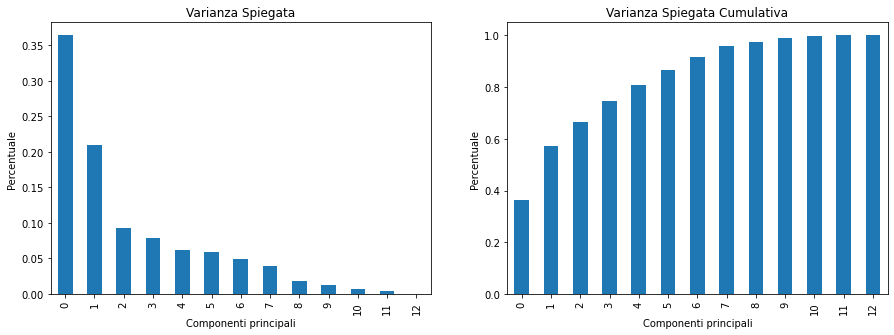

0     0.363913
1     0.573289
2     0.666315
3     0.745181
4     0.807689
5     0.867454
6     0.917325
7     0.957347
8     0.975588
9     0.988515
10    0.995205
11    0.999979
12    1.000000
Name: cumulative explained variance ratio, dtype: float64


In [140]:
df_variance_PCA['cumulative explained variance ratio'] = df_variance_PCA.cumsum()['explained variance ratio']

fig = plt.figure(figsize=(15,5))

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

df_variance_PCA.plot.bar(y=['explained variance ratio'], ax=ax0, legend=False)
df_variance_PCA.plot.bar(y=['cumulative explained variance ratio'], ax=ax1, legend=False)

ax0.set_title('Varianza Spiegata')
ax0.set_xlabel('Componenti principali')
ax0.set_ylabel('Percentuale')

ax1.set_title('Varianza Spiegata Cumulativa')
ax1.set_xlabel('Componenti principali')
ax1.set_ylabel('Percentuale')
plt.show()

print(df_variance_PCA['cumulative explained variance ratio'])

In [141]:
n_comp = 8

df_clustering = df_princ_comp.iloc[:,0:n_comp]
df_clustering.head()

#df_clustering.to_csv("pca_LL1.csv", index=False)

,comp 0,comp 1,comp 2,comp 3,comp 4,comp 5,comp 6,comp 7
0,-3.136179,12.634757,-0.884081,-2.825489,-3.042891,-2.304783,4.514092,2.304967
1,0.106826,13.559909,-1.845443,-2.366700,-0.393691,-0.765289,1.422686,1.462920
2,2.304684,13.867796,-2.015155,0.124457,3.470065,0.091623,-0.683119,0.619141
3,0.569732,9.454794,-1.575248,-1.402212,0.462502,0.044464,-0.385651,0.400397
4,-0.425762,5.545482,-0.376443,2.025570,-1.028027,-2.283884,1.703284,0.069153


In [142]:
n_clusters = 35

clustering = AgglomerativeClustering(n_clusters=n_clusters)
clustering = clustering.fit(df_clustering.values)

df_clustered = df_rough
df_clustered.loc[:,'cluster'] = clustering.labels_
#del df_clustered['Cluster']
df_clustered.head()

df_prova = df_clustered['cluster']
#df_prova.to_csv('cluster_LL1.csv', index=False)

In [143]:
df_synth = df_clustered.groupby('cluster').apply(lambda x: x.sample())
df_synth = df_synth.reset_index(level=0, col_level=2 , drop=True)
df_synth

,r,b,swpd,free,buff,cache,si,so,bi,bo,in,cs,us,sy,id,wa,st,Cluster,cluster
215,4,0,0,3683880,47420,1434624,0,0,0,12,869,382,0,26,73,0,0,2,0
98,1,0,0,3701808,46848,1433996,0,0,5632,0,1547,851,0,60,36,4,0,2,1
176,2,0,0,3668112,47556,1434756,0,0,0,0,1987,536,0,54,46,0,0,2,2
245,0,0,0,3706092,46856,1434128,0,0,0,0,83,124,0,0,100,0,0,4,3
55,1,0,0,3675492,47596,1434800,0,0,0,12,1174,433,0,34,65,0,0,2,4
288,1,0,0,3687216,47540,1434740,0,0,0,0,1173,583,1,42,56,1,0,5,5
118,2,0,0,3691524,47364,1434588,0,0,0,0,1241,415,0,40,60,0,0,2,6
126,4,0,0,3690964,47428,1434628,0,0,0,0,1410,806,0,51,49,0,0,2,7
50,5,0,0,3668080,47572,1434776,0,0,0,0,1119,464,0,42,58,0,0,2,8
27,2,0,0,3694288,47428,1434624,0,0,0,56,519,405,0,13,87,0,0,2,9


In [111]:
print(df_synth.to_latex(index=False))

df_synth.to_csv('D:/Documenti/universita/Magistrale/Secondo_anno/Impianti di Elaborazione/Benchmark/Web Server/WL_LL1_35cluster_buono.csv', index=False)

\begin{tabular}{rrrrrrrrrrrrrrrrrr}
\toprule
 r &  b &  swpd &     free &   buff &    cache &  si &  so &    bi &   bo &    in &    cs &  us &  sy &   id &  wa &  st &  cluster \\
\midrule
 4 &  0 &     0 &  3689497 &  47252 &  1434643 &   0 &   0 &     0 &    0 &  1399 &   606 &   0 &  56 &   44 &   0 &   0 &        0 \\
 3 &  0 &     0 &  3699113 &  46924 &  1434330 &   0 &   0 &     0 &    0 &  1525 &   599 &   1 &  56 &   43 &   0 &   0 &        1 \\
 2 &  0 &     0 &  3720188 &  46876 &  1395808 &   0 &   0 &  1280 &    0 &  1508 &   735 &   0 &  54 &   45 &   0 &   0 &        2 \\
 2 &  0 &     0 &  3701388 &  46884 &  1434182 &   0 &   0 &  5504 &    0 &   741 &   481 &   0 &  42 &   58 &   1 &   0 &        3 \\
 5 &  0 &     0 &  3688757 &  47364 &  1434609 &   0 &   0 &     0 &    0 &  1406 &   552 &   1 &  66 &   33 &   0 &   0 &        4 \\
 0 &  0 &     0 &  3689699 &  47444 &  1434565 &   0 &   0 &     0 &    0 &  1140 &   468 &   0 &  43 &   56 &   0 &   0 &        5 \\
 

In [144]:
dev_tot = df_scaled.sub(df_scaled.mean()).pow(2).sum().sum()

df_pca = df_princ_comp.iloc[:,0:n_comp]
dev_pca = df_pca.sub(df_pca.mean()).pow(2).sum().sum()

dev_pca_ratio = dev_pca/dev_tot

df_clustering.loc[:,'cluster'] = clustering.labels_
n_elem = df_clustering.groupby('cluster').count().values[:,0]
centroids = df_clustering.groupby('cluster').mean()

arr = np.zeros(shape=(n_clusters,1))

for i in range(n_clusters):
    elem_i = df_clustering.loc[df_clustering['cluster'] == i].drop(columns='cluster')
    arr[i] = elem_i.sub(centroids.loc[i,:]).pow(2).sum().sum()
    
dev_intra = arr.sum()

dev_intra_ratio = dev_intra/dev_pca

dev_inter = centroids.sub(df_clustering.mean()).pow(2).mul(n_elem, axis=0).sum().sum()

print(centroids)

dev_inter_ratio = dev_inter/dev_pca
print('dev_intra + dev_inter = ' + str(dev_intra + dev_inter))
print('dev_pca = ' + str(dev_pca))

print('***'*5)
print('Devianza pre-PCA: ', dev_tot)
print('Devianza conservata post-PCA: ', dev_pca_ratio)
print('Devianza intra cluster post PCA+Clustering: ',dev_intra_ratio)
print('Devianza inter cluster post PCA+Clustering: ', dev_inter_ratio)

dev_lost_ratio = (1-dev_pca_ratio) + dev_intra_ratio * dev_pca_ratio
print('Totale devianza persa dopo PCA(8 comp) e Clustering(20 cluster) :', dev_lost_ratio)

           comp 0     comp 1    comp 2    comp 3    comp 4    comp 5  \
cluster                                                                
0       -0.309861  -0.710344 -0.037290 -0.285220  0.427742 -0.912227   
1        1.121852   1.820902 -0.233399  0.099161 -1.566469  0.490729   
2        2.103581  -0.149914 -0.571124 -0.027521 -0.809542  0.479572   
3       -4.410039  -0.012824  0.458660 -0.067687  0.123267  0.093177   
4        0.229569  -0.897833 -0.224296 -0.291208  0.208088  0.112751   
5        1.898214   1.019881 -1.287417 -0.481813  2.744110  0.430608   
6        0.444065  -0.073198 -0.265719  0.073777 -0.606256  0.633038   
7        2.382190   0.056306 -0.330003 -0.000688 -0.621920 -0.203162   
8        1.540771  -0.824307 -0.279823 -0.155997  0.279349 -0.708326   
9        0.074303  -0.054542 -0.001868  2.392295  0.162474 -0.280738   
10       2.433838  -0.558441 -0.414635 -0.338125  0.030934 -1.354659   
11      -1.283459  -0.380470 -0.052204 -0.022989 -0.110970  0.40

C:\Users\domyb\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\domyb\anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [147]:
df_dev_stampare = pd.DataFrame(columns=['dev_tot', 'dev_postPCA','dev_intra_cluster', 'dev_inter_cluster','dev_tot_persa'])

dev_temp_stampa = [dev_tot, dev_pca_ratio, dev_intra_ratio, dev_inter_ratio, dev_lost_ratio]
#df_dev_stampare['dev_tot']=dev_tot
#df_dev_stampare['dev_postPCA']=dev_pca_ratio
#df_dev_stampare['dev_intra_cluster']=dev_intra_ratio
#df_dev_stampare['dev_inter_cluster']=dev_inter_ratio
#df_dev_stampare['dev_tot_persa']=dev_lost_ratio

#df_dev_stampare.append(dev_temp_stampa)

df_dev_stampare.loc[0]=dev_temp_stampa

print(df_dev_stampare.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  dev\_tot &  dev\_postPCA &  dev\_intra\_cluster &  dev\_inter\_cluster &  dev\_tot\_persa \\
\midrule
0 &   3952.0 &     0.975588 &           0.062289 &           0.956505 &       0.102285 \\
\bottomrule
\end{tabular}



In [145]:
nmin_comp = 3
nmax_comp = 9
n_comp = nmax_comp-nmin_comp+1

nmax_cluster = 50

array_dev_lost = np.zeros(shape=(nmax_cluster,n_comp))

for i in range(nmin_comp,nmax_comp+1):
    for j in range(1,nmax_cluster+1):
        
        df_clustering = df_princ_comp.iloc[:,0:i]
            
        # clustering
        clustering = AgglomerativeClustering(n_clusters=j)
        clustering = clustering.fit(df_clustering.values)
        df_clustering.insert(len(df_clustering.columns), 'cluster', clustering.labels_)

        # deviance PCA
        df_pca = df_princ_comp.iloc[:,0:i]
        dev_pca = df_pca.sub(df_pca.mean()).pow(2).sum().sum()

        # deviance clustering 
        n_elem = df_clustering.groupby('cluster').count().values[:,0]
        centroids = df_clustering.groupby('cluster').mean()

        # intra-cluster deviance
        arr = np.zeros(shape=(j,1))
        for k in range(j):
            elem_k = df_clustering.loc[df_clustering['cluster'] == k].drop(columns='cluster')
            arr[k] = elem_k.sub(centroids.loc[k,:]).pow(2).sum().sum()
        dev_intra = arr.sum()

        # inter-cluster deviance
        dev_inter = centroids.sub(df_clustering.mean()).pow(2).mul(n_elem, axis=0).sum().sum()

        # deviance lost
        dev_pca_ratio = dev_pca/dev_tot
        dev_inter_ratio = dev_inter/dev_pca
        dev_lost = 1 - dev_inter_ratio * dev_pca_ratio

        array_dev_lost[j-1][i-n_comp+1] = dev_lost

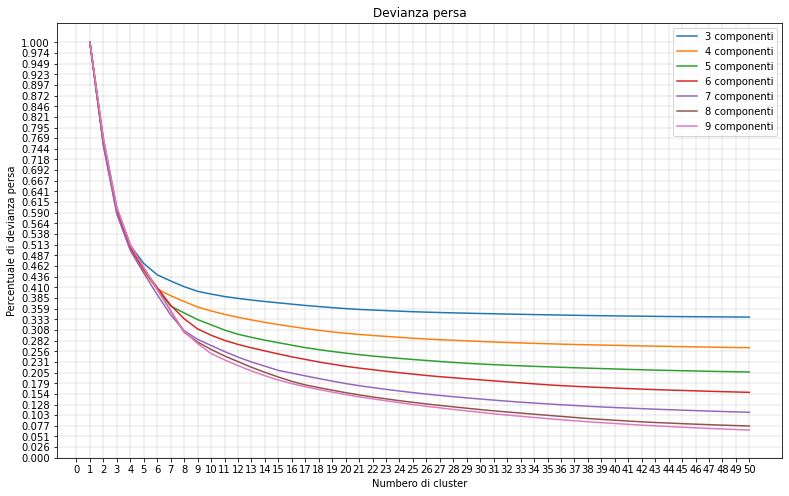

In [146]:
x = np.arange(1,nmax_cluster+1)

plt.figure(figsize=(13,8))

for i in range(nmin_comp,nmax_comp+1):
    y_dev_lost = array_dev_lost[:,i-n_comp+1]
    plt.plot(x, y_dev_lost)
    
c = [str(s) for s in range(nmin_comp,nmax_comp+1)]
c = [s + ' componenti' for s in c]
    
plt.title('Devianza persa')
plt.ylabel('Percentuale di devianza persa')
plt.xlabel('Numbero di cluster')
plt.xticks(range(nmax_cluster+1))
plt.yticks(np.linspace(0,y_dev_lost.max(),40))
plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.legend(c)
plt.show()


[0.00328947 0.00498887 0.00590312 0.00672332 0.00769266 0.00869471
 0.00979889 0.01083903 0.01186345 0.01296256 0.01404605 0.01514565
 0.01623695 0.01732502 0.01840232 0.01946405 0.02050847 0.02155452
 0.02258743 0.02362844 0.02466318 0.02573817 0.02680442 0.02786337
 0.02891468 0.02998221 0.03105454 0.03212876 0.03320069 0.03427427
 0.03534771 0.03642067 0.03749023 0.0385562  0.03962354 0.04068712
 0.04174708 0.04280965 0.0438705  0.04493913 0.04601154 0.04708181
 0.04815112 0.04921907 0.05029735 0.05137714 0.05245811 0.05353907
 0.05462264 0.05570671]
[0.00328947 0.0049429  0.00580356 0.00659958 0.00736769 0.00801994
 0.00898286 0.00990039 0.01074289 0.01162983 0.01249304 0.01335219
 0.01419257 0.01501114 0.01582316 0.01662319 0.01739634 0.01817059
 0.0189354  0.01972392 0.02051415 0.02130733 0.02210462 0.02289071
 0.02366768 0.0244552  0.02525158 0.0260529  0.02684867 0.0276381
 0.02842459 0.02921229 0.03000896 0.03080749 0.03160489 0.03239739
 0.03319067 0.03399881 0.03480668 0.035

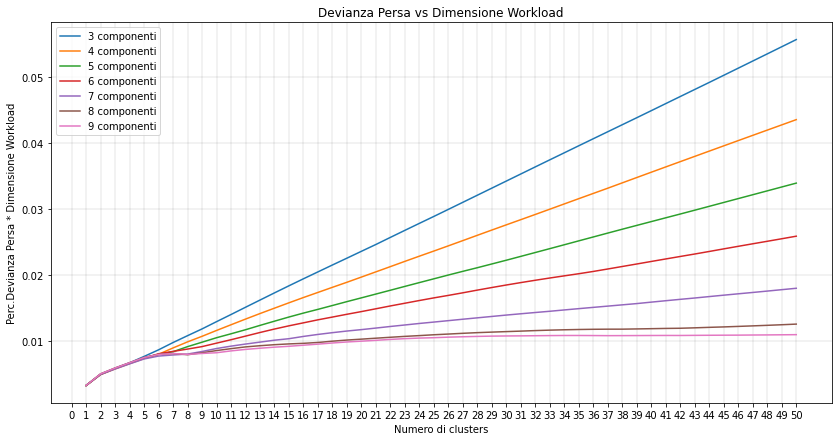

In [93]:
dim_synt = np.arange(1,nmax_cluster+1)*df_rough.shape[1]
dim_real = df_rough.size

array_dim = dim_synt/dim_real

x = np.arange(1,nmax_cluster+1)
y_dim = array_dim

plt.figure(figsize=(14,7))

for i in range(nmin_comp,nmax_comp+1):
    y_dev_lost = array_dev_lost[:,i-n_comp+1]
    plt.plot(x, y_dim*y_dev_lost)
    print(y_dim*y_dev_lost)

c = [str(s) for s in range(nmin_comp,nmax_comp+1)]
c = [s + ' componenti' for s in c]
    
plt.title('Devianza Persa vs Dimensione Workload')
plt.ylabel('Perc.Devianza Persa * Dimensione Workload')
plt.xlabel('Numero di clusters')
plt.xticks(range(nmax_cluster+1))
plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.legend(c)
plt.show()

In [97]:
array_dev_lost[35][5]

0.2735779363974704